Authors: Adnan Amir & Srijan Dokania

Course: CS 5330 Spring 24

Purpose: Trains a model and saves it (Tasks 1A-1D)

In [3]:
import sys
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from networks import MyNetwork, MyGaborNetwork
import utils

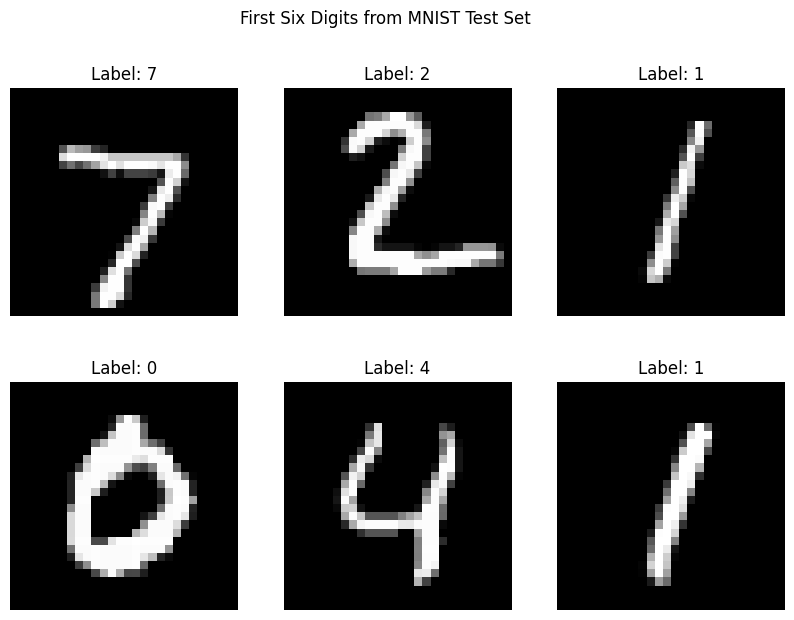

In [6]:
# Load the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create a figure to display the images
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle('First Six Digits from MNIST Test Set')

# Display the first six digits
for i in range(6):
    # Calculate the position of the subplot
    ax = axs[i // 3, i % 3]
    # Retrieve the image and label
    image, label = test_dataset[i]
    # The image needs to be converted from a torch.Tensor to a numpy array and squeezed (to remove the channel dimension for grayscale images)
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.show()

Testing: 100%|████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.27it/s, accuracy=95.1, loss=166]


Average test loss: 0.1664, Accuracy: 0.9510


Testing: 100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  4.34it/s, accuracy=97.2, loss=98.4]


Average test loss: 0.0984, Accuracy: 0.9715


Testing: 100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  4.09it/s, accuracy=97.7, loss=80.6]


Average test loss: 0.0806, Accuracy: 0.9765


Testing: 100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  4.15it/s, accuracy=97.9, loss=69.4]


Average test loss: 0.0694, Accuracy: 0.9794


Testing: 100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  4.27it/s, accuracy=98.1, loss=61.4]

Average test loss: 0.0614, Accuracy: 0.9811


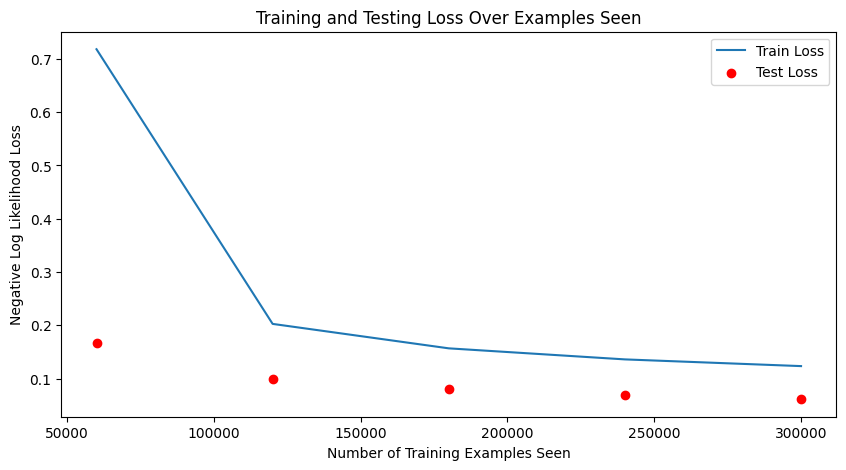

In [2]:
def main():
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Data loading
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

    # Model Loading
    model = MyNetwork().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

    # Lists to store loss values
    train_losses = []
    test_losses = []
    examples_seen = 0  # Cumulative count of training examples seen

    # Train and test the network
    for epoch in range(1, 6):
        avg_train_loss, num_examples = utils.train_network(model, device, train_loader, optimizer, epoch)
        examples_seen += num_examples  # Increment total examples seen
        train_losses.append((examples_seen, avg_train_loss))

        avg_test_loss, test_accuracy = utils.test_network(model, device, test_loader)
        test_losses.append((examples_seen, avg_test_loss))  # Record test loss at the end of the epoch

    # Save the model after training
    torch.save(model.state_dict(), "mnist_model.pt")

    # Plotting training and test losses
    plt.figure(figsize=(10, 5))
    train_x, train_y = zip(*train_losses)  # Unpack examples seen and loss into separate lists
    test_x, test_y = zip(*test_losses)
    plt.plot(train_x, train_y, label='Train Loss')
    plt.scatter(test_x, test_y, color='red', label='Test Loss')
    plt.xlabel('Number of Training Examples Seen')
    plt.ylabel('Negative Log Likelihood Loss')
    plt.legend()
    plt.title('Training and Testing Loss Over Examples Seen')
    plt.show()

if __name__ == "__main__":
    main()

Epoch 1: Average Training Loss: 0.3389


Testing: 100%|████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.51it/s, accuracy=96.9, loss=109]


Average test loss: 0.1087, Accuracy: 0.9686
Epoch 1: Test Loss: 0.1087, Test Accuracy: 0.9686


Epoch 2: Average Training Loss: 0.1654


Testing: 100%|█████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.48it/s, accuracy=97.4, loss=88]


Average test loss: 0.0880, Accuracy: 0.9739
Epoch 2: Test Loss: 0.0880, Test Accuracy: 0.9739


Epoch 3: Average Training Loss: 0.1356


Testing: 100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  3.41it/s, accuracy=97.9, loss=69.9]


Average test loss: 0.0699, Accuracy: 0.9794
Epoch 3: Test Loss: 0.0699, Test Accuracy: 0.9794


Epoch 4: Average Training Loss: 0.1170


Testing: 100%|█████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.45it/s, accuracy=98, loss=68.5]


Average test loss: 0.0685, Accuracy: 0.9795
Epoch 4: Test Loss: 0.0685, Test Accuracy: 0.9795


Epoch 5: Average Training Loss: 0.1088


Testing: 100%|█████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.15it/s, accuracy=98, loss=63.2]


Average test loss: 0.0632, Accuracy: 0.9796
Epoch 5: Test Loss: 0.0632, Test Accuracy: 0.9796


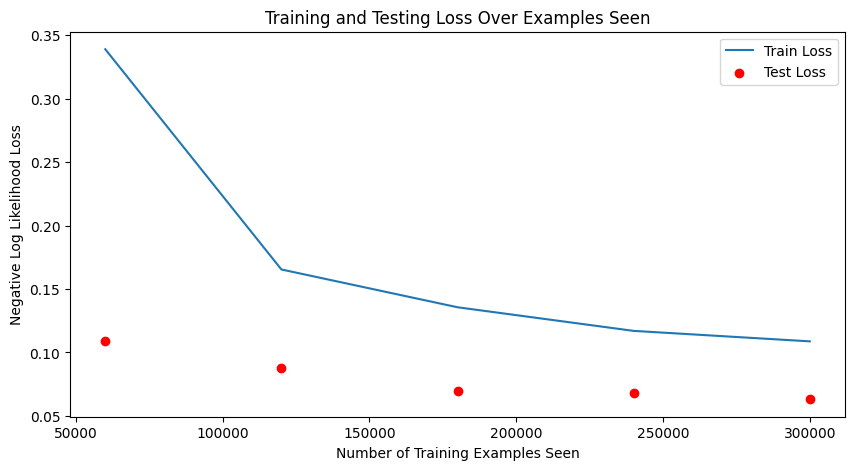

In [3]:
#Extension: Training The Gabor MNIST Model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

model = MyGaborNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Lists to store loss values
train_losses = []
test_losses = []
examples_seen = 0  # Cumulative count of training examples seen

# Training and testing the network
for epoch in range(1, 6):
    avg_train_loss, num_examples = utils.train_network(model, device, train_loader, optimizer, epoch)
    examples_seen += num_examples
    train_losses.append((examples_seen, avg_train_loss))
    print(f'Epoch {epoch}: Average Training Loss: {avg_train_loss:.4f}')
    avg_test_loss, test_accuracy = utils.test_network(model, device, test_loader)
    test_losses.append((examples_seen, avg_test_loss))
    print(f'Epoch {epoch}: Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

torch.save(model.state_dict(), "mnist_gabor_model.pt")

# Plotting training and test losses
plt.figure(figsize=(10, 5))
train_x, train_y = zip(*train_losses)  # Unpack examples seen and loss into separate lists
test_x, test_y = zip(*test_losses)
plt.plot(train_x, train_y, label='Train Loss')
plt.scatter(test_x, test_y, color='red', label='Test Loss')
plt.xlabel('Number of Training Examples Seen')
plt.ylabel('Negative Log Likelihood Loss')
plt.legend()
plt.title('Training and Testing Loss Over Examples Seen')
plt.show()

